In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

/Users/brentskoumal/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Classification

Recall that in *classification* we attempt to predict a categorical (qualitative) variable based on based on several features or attributes. This differs from *regression*, where we try to predict a real-valued (quantitative) variable. 

**Setup:** Given $n$ samples $(x_1,y_1), (x_2,y_2),\ldots,(x_n,y_n)$, where $x_i$ are attributes or features and $y_i$ are categorical variables that you want to predict. 

** Classification Goal:** Create a rule that can be used to assign new observations (not in the sample) a class $y$ (either 0 or 1), based on the features $x$ of the point. 



## The first method for classification:  k Nearest Neighbors (k-NN) 

**Idea:** To decide the class of a given point, find the k nearest neighbors of that point, and let them "vote" on the class. That is, we assign the sample to the class most common among its k nearest neighbors. 

**Considerations:**
1. We must pick k, the number of voting neighbors (typically a small number, say k=10)
+ 'Nearest' means closest in distance, so there is some flexibility in defining the distance
+ There are different ways to vote. For example, of the k nearest neighbors, I might give the closest ones more weight than farther ones. 
+ We have to decide how to break ties in the vote. 

**Euclidean distance**
- Most commonly used distance measure
- Euclidean distance also called as simply distance
- The usage of Euclidean distance measure is highly recommended when data is dense or continuous
- Euclidean distance is the best proximity measure
- The Euclidean distance between two points is the length of the path connecting them
- The Pythagorean theorem gives this distance between two points.

KNN classifier is also considered to be an instance based learning / non-generalizing algorithm. It stores records of training data in a multidimensional space. For each new sample & particular value of K, it recalculates Euclidean distances and predicts the target class. So, it does not create a generalized internal model.


#### Knn implementation with Sklearn

In [2]:
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [7]:
import seaborn as sns
sns.set()
df = sns.load_dataset("iris") 
df.to_csv('iris.csv')


In [ ]:
import pandas as pd
pd.read_csv('iris.csv',)

### Dataset: The Iris dataset

The dataset contains 4 features (attributes) of 50 samples containing 3 different types of iris plants. The goal is to classify the type of iris plant given the attributes. 

**Features (attributes):**
1. sepal length (cm) 
+ sepal width (cm) 
+ petal length (cm) 
+ petal width (cm) 

**Classes:**
1. Iris Setosa 
+ Iris Versicolour 
+ Iris Virginica

<img src="https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAmtAAAAJDY1ZWM0YjI1LTI1NDYtNGY0Mi05Y2M2LTA0NDFiMDBhYTdkNw.png">

In [8]:
print(df.columns)
print(df.shape)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
(150, 5)


In [10]:
df.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [11]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

# print and check shapes of X and y
print("shape of X: ", X.shape, "& shape of y: ", y.shape)

shape of X:  (150, 4) & shape of y:  (150,)


In [15]:
# Instantiate the kNN estimator
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X,y)
y_pred = knn1.predict(X)
accuracy_score(y,y_pred)

1.0

100% accuracy seems great... but is it correct?

no, because kNN is a memory based algorithm, we just memorized the dataset, and since we fit with n_neighbors = 1 we are just regurgitating the actual (ground_truth) labels

we need to split our data into training and testing sets

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [17]:
# print and check shapes of X_train and y_train
print("shape of X_train: ", X_train.shape, "& shape of y_train: ", y_train.shape)
# print and check shapes of X_test and y_test
print("shape of X_test: ", X_test.shape, "& shape of y_train: ", y_test.shape)

shape of X_train:  (100, 4) & shape of y_train:  (100,)
shape of X_test:  (50, 4) & shape of y_train:  (50,)


In [18]:
# instantiate a model with k = 1 neighbor
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train,y_train)
knn1.score(X_test,y_test)

0.93999999999999995

In [19]:
# instantiate a model with k = 5 neighbors, 
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
knn5.score(X_test,y_test)

0.97999999999999998

In [20]:
# instantiate a model with k = 10 neighbors, 
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, y_train)
knn10.score(X_test,y_test)

0.95999999999999996

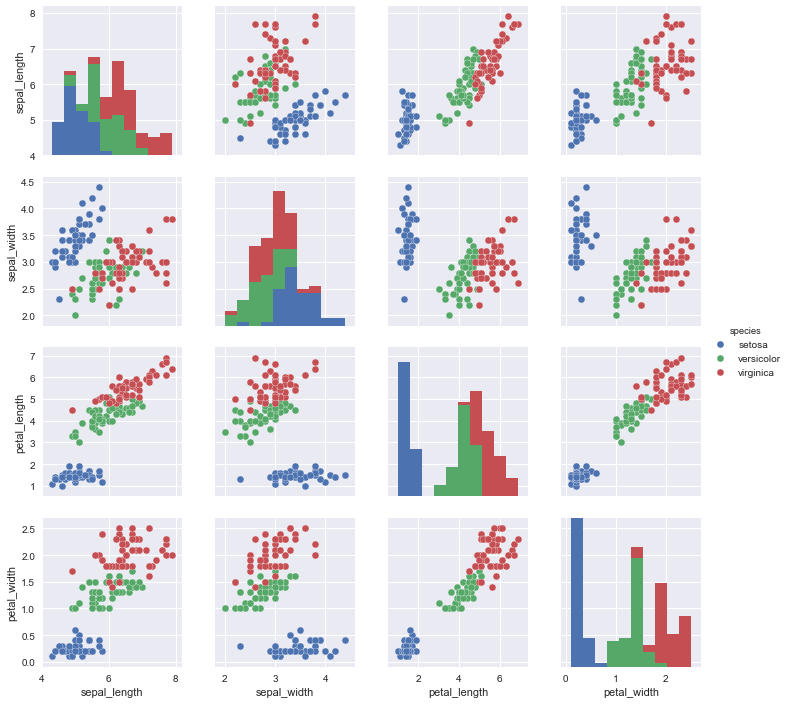

In [13]:
sns.pairplot(df, hue="species")

In [21]:
# Create a couple test points
test_point_1 = [[3, 4, 5, 2]]

In [22]:
#make a prediction for each knn model using the test points
print("n_neighbors=1 predicts: ", knn1.predict(test_point_1))
#make a prediction for each knn model using the test points
print("n_neighbors=5 predicts: ", knn5.predict(test_point_1))
#make a prediction for each knn model using the test points
print("n_neighbors=10 predicts: ", knn10.predict(test_point_1))

n_neighbors=1 predicts:  ['versicolor']
n_neighbors=5 predicts:  ['versicolor']
n_neighbors=10 predicts:  ['virginica']


It looks like the number of neighbors slightly changes the prediction of the test points...


In [23]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
X_std = sclr.fit_transform(X)
X_train_std, X_test_std, y_train, y_test = train_test_split(X_std, y, test_size=0.33, random_state=42)

In [24]:
# instantiate a model with k = 1 neighbor
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_std,y_train)
knn1.score(X_test_std,y_test)

0.95999999999999996

In [25]:
# instantiate a model with k = 5 neighbors, 
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_std, y_train)
knn5.score(X_test_std,y_test)

0.97999999999999998

In [26]:
# instantiate a model with k = 10 neighbors, 
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train_std, y_train)
knn10.score(X_test_std,y_test)

0.97999999999999998

In [27]:
#make a prediction for each knn model using the test points
print("n_neighbors=1 predicts: ", knn1.predict(test_point_1))
#make a prediction for each knn model using the test points
print("n_neighbors=5 predicts: ", knn5.predict(test_point_1))
#make a prediction for each knn model using the test points
print("n_neighbors=10 predicts: ", knn10.predict(test_point_1))

n_neighbors=1 predicts:  ['virginica']
n_neighbors=5 predicts:  ['virginica']
n_neighbors=10 predicts:  ['virginica']


**Some preliminary comments on the parameter, $k$:** 

- For k large (say $k=100$), the *decision boundary* (boundary between classes) becomes more smooth. The model is not very complex - it could basically be described by a line. The model is stable in the sense that if the data were to change slightly, the model wouldn't change much. (There are many voters.) Since the model doesn't depend on the data very much, we might expect that it would *generalize* to new data points. 

- For k small (say $k=1$), the decision boundary is very wiggly. The model is very complex - it definitely isn't described by a single line. If the model is unstable in the sense that if the data were to change slightly, the model would change quite a bit. Since the model is very dependent on the dataset, we would say that it wouldn't generalize to new data points well. In this case, we would say that the model has overfit the data. (We saw a similar phenomena in regression using high degree polynomials.) 


**Questions:**
1. How to choose k? (more on this below)


In [29]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26, 2)) # should we use odd?
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_train_std)
    scores.append(metrics.accuracy_score(y_train, y_pred))

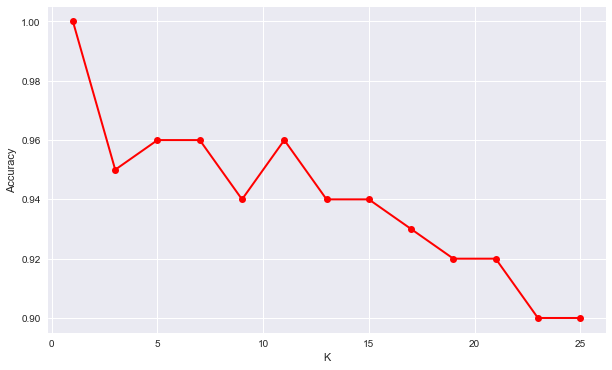

In [30]:
# plot the relationship between K and testing accuracy
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, scores, 'ro', linewidth=2.0, linestyle="-")
plt.xlabel('K')
plt.ylabel('Accuracy')

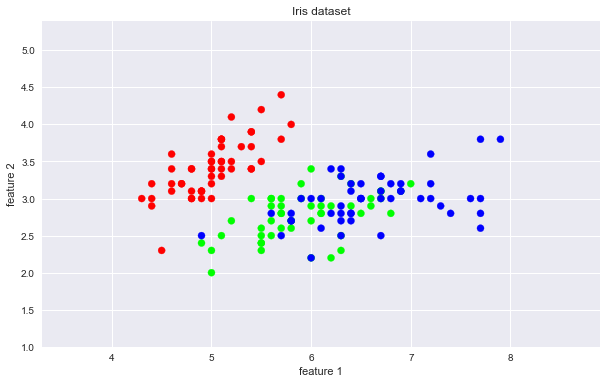

In [33]:
# For easy plotting and interpretation, we only use first 2 features here. 
# We're throwing away useful information - don't do this at home! 
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
iris = load_iris()

X = iris.data[:,:2]  
y = iris.target

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# plot data
plt.scatter(X[:, 0], X[:, 1], c=y,  marker="o", cmap=cmap_bold, s=50)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)    
plt.title('Iris dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

In [46]:
# set up the model, k-NN classification with k = ?  

k = 10
clf = KNeighborsClassifier(n_neighbors=k, n_jobs = 1)
clf.fit(X_train_std, y_train)

# plot classification 
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))
zz = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, zz, cmap=cmap_light)

# plot data
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y, cmap=cmap_bold,s=30)

plt.title('Classification of Iris dataset using k-NN with k = '+ str(k))
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)    
plt.show()

print('Confusion Matrix:')
y_pred = clf.predict(X)
print(metrics.confusion_matrix(y_true = y_train, y_pred = y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred))


ValueError: query data dimension must match training data dimension

# Model generalizability and cross-validation

In classification, and other prediction problems, we would like to develop a model on a dataset, the *training dataset*, that will not only perform well on that dataset but on similar data that the model hasn't yet seen, the *testing dataset*. If a model satisfies this criterion, we say that it is *generalizable*. 

If a model has 100% accuracy on the training dataset ($k=1$ in k-NN) but doesn't generalize to new data, then it isn't a very good model. We say that this model has *overfit* the data. On the other hand, it isn't difficult to see that we could also *underfit* the data (taking $k$ large in k-NN). In this case, the model isn't complex enough to have good accuracy on the training dataset. 

**Cross-validation** is a general method for assessing how the results of a model (classification, regression,...) will *generalize* to an independent data set. In classification, cross-validation is a method for assessing how well the classification model will predict the class of points that weren't used to *train* the model. 

The idea of the method is simple: 
1. Split the dataset into two groups: the training dataset and the testing dataset. 
+ Train the model on the training dataset. 
+ Check the accuracy of the model on the testing dataset. 

In practice, you have to decide how to split the data into groups (i.e. how large the groups should be). You might also want to repeat the experiment so that the assessment doesn't depend on the way in which you split the data into groups. We'll worry about this in a later lecture. 

For now, I just want you to conceptually understand how generalizable k-NN is as we vary the parameter, k. 

<img src="https://cambridgecoding.files.wordpress.com/2016/03/figures_mod4_over_underfitting.png?w=1220&h=1612" width="500">

$\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad$ 
source: [this blog](https://blog.cambridgecoding.com/2016/03/24/misleading-modelling-overfitting-cross-validation-and-the-bias-variance-trade-off/)

As the model becomes more complex (k decreases), the accuracy always increases for the training dataset. But, at some point, it starts to overfit the data and the accuracy decreases for the test dataset


In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# we can make a KFold iterator first
kfold = KFold(n_splits=10, shuffle=True, random_state=0) 

# use our KFold iterator in cross_val_score
scores = cross_val_score(estimator=knn5, X=X_train_std, y=y_train, cv=kfold)

print("CV Scores: {}".format(scores))
# we average the CV scores to summarize the test performance
print('Average CV Score: {}'.format(scores.mean()))

CV Scores: [ 1.   0.9  0.9  1.   0.9  0.9  0.9  1.   1.   0.9]
Average CV Score: 0.9400000000000001


## Conclusions and take-away

1. k-NN is a very simple method that can be used for classification.   

+ Model accuracy (measured on the training dataset) and generalizability (measured on the testing dataset) are both important and often in contention with one another. Model accuracy can be measured using the confusion matrix or the percent of misclassified samples. Generalizability can be measured via cross validation. 

+ Picking parameters in models (such as k in k-NN) is non-trivial, but can be done via cross validation. 

### Exercise
Use k-NN to classify the dataset from the Wisconsin Breast Cancer Dataset. What's the best value of k here? 


Wisconsin Breast Cancer Data Set

This dataset consists of 10 continuous attributes and 1 target class attributes. Class attribute shows the observation result, whether the patient is suffering from the benign tumor or malignant tumor. Benign tumors do not spread to other parts while the malignant tumor is cancerous. The dataset was collected & openly distributed so as to find out some patterns from this data.

Class attribute shows the observation result, whether the patient is suffering from the benign tumor or malignant tumor. Benign tumors do not spread to other parts while the malignant tumor is cancerous. The dataset was collected & openly distributed so as to find out some patterns from this data.

In [ ]:
from sklearn.datasets import load_breast_cancer
blob = load_breast_cancer()
#data.target[[10, 50, 85]]

**Problem Statement:**

To model the knn classifier using the Breast Cancer data for predicting whether a patient is suffering from the benign tumor or malignant tumor.

**KNN Model for Cancerous tumor detection:**

To diagnose Breast Cancer, the doctor uses his experience by analyzing details provided by the Patient’s Past Medical History (Reports of all the tests performed)

Using the modeled KNN classifier, we will solve the problem in a way similar to the procedure used by doctors. The modeled KNN classifier will compare the new patient’s test reports, observation metrics with the records of patients(training data) that correctly classified as benign or malignant.

In [ ]:
print(blob.DESCR)

In [ ]:
#y = data.target
#X = blob.data
#X[:,:]